# Problemas de Estadística Descriptiva

## Ejercicio 1 – ¿Qué tan largos son los títulos de las películas?

En este ejercicio vas a aplicar técnicas de estadística descriptiva sobre un conjunto de datos real: una base con 1000 películas populares del sitio IMDb.

A partir del título de cada película, vas a:
- Calcular la longitud del título (en caracteres).
- Obtener métricas estadísticas clave: media, mediana, moda, rango, varianza, desviación estándar, asimetría y curtosis.
- Identificar los títulos más largos y más cortos.
- Visualizar la distribución de estas longitudes con un histograma y una curva de densidad.


In [1]:
# Importar librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, mode

# Cargar dataset de IMDb
url = "../assets/imdb_1000.csv"
df = pd.read_csv(url)
df

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


In [2]:
# Crea una nueva columna llamada 'title_length' con la longitud (número de caracteres) de cada título
df['title_length'] = df['title'].apply(len)
df

,star_rating,title,content_rating,genre,duration,actors_list,title_length
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...",24
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']",13
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv...",22
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E...",15
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L....",12
...,...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G...",7
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma...",27
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo...",47
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr...",11


In [3]:
# Calcula media, mediana y moda de la columna 'title_length'
media = df['title_length'].mean()
media

np.float64(15.481103166496425)

In [4]:
# Calcula el rango, la varianza y la desviación estándar de 'title_length'
minimo = df['title_length'].min()
maximo = df['title_length'].max()
rango = maximo - minimo
rango


np.int64(67)

In [5]:
varianza = df['title_length'].var()
varianza


np.float64(72.1067488840288)

In [6]:
desviacion = df['title_length'].std()
desviacion


np.float64(8.491569282766807)

In [7]:
# Calcula asimetría y curtosis de la columna 'title_length'
asimetria = skew(df['title_length'])
asimetria

np.float64(1.5229143965677572)

In [8]:
# Imprime el título más corto y el título más largo según su longitud
titulo_mas_corto = df[df['title_length'] == minimo]['title'].values[0]
titulo_mas_largo = df[df['title_length'] == maximo]['title'].values[0]
titulo_mas_corto, titulo_mas_largo

('M', 'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb')

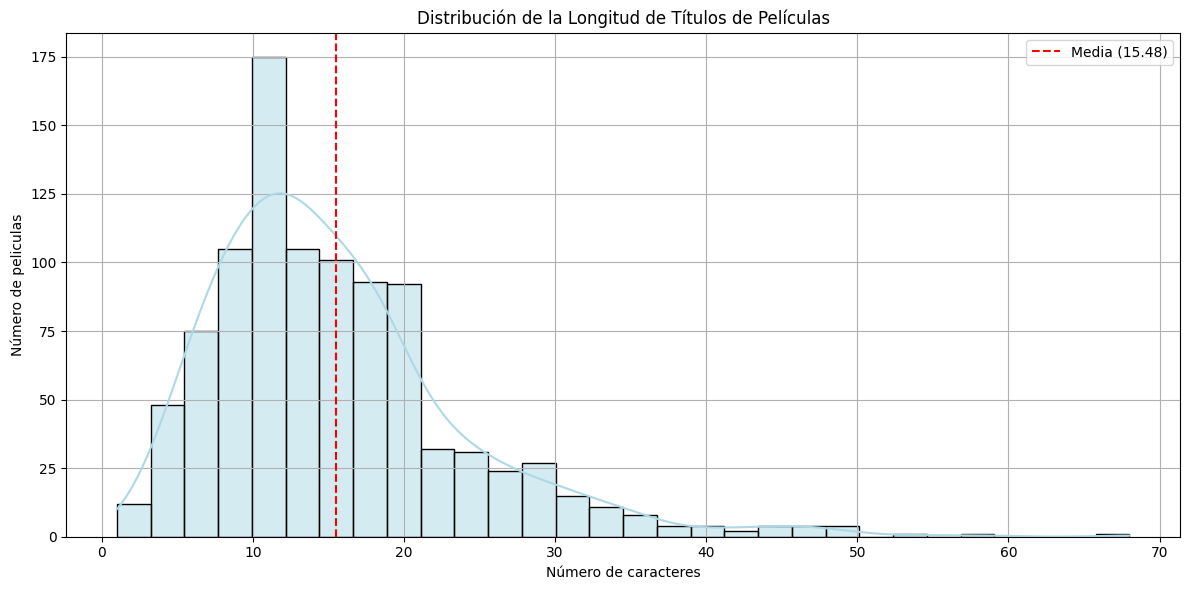

In [9]:
# grafica tus resultados
plt.figure(figsize=(12, 6))
sns.histplot(df['title_length'], bins=30, kde=True, color='lightblue')
plt.axvline(media, color='red', linestyle='--', label=f"Media ({media:.2f})")
plt.title("Distribución de la Longitud de Títulos de Películas")
plt.xlabel("Número de caracteres")
plt.ylabel("Número de peliculas")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

---

## Ejercicio 2 – Cálculo manual de desviación estándar

En este ejercicio vas a calcular manualmente la desviación estándar, seleccionando cinco títulos reales del dataset de películas que cargaste antes.


In [10]:
# Crea una lista con 5 valores reales de df['title_length'], por ejemplo: [10, 13, 14, 18, 22]
muestra = df['title_length'].sample(5).to_list()
muestra

[8, 16, 12, 24, 12]

In [11]:
# Calcula la media de los 5 valores
suma = sum(muestra)
totaltit = len(muestra)
media = suma / totaltit
media

14.4

In [12]:
# Calcula las diferencias al cuadrado con respecto a la media
diferencias_cuadrado = [(x - media)**2 for x in muestra]
diferencias_cuadrado

[40.96000000000001,
 2.5599999999999987,
 5.760000000000002,
 92.16,
 5.760000000000002]

In [13]:
for i, val in enumerate(diferencias_cuadrado):
    print(f"({muestra[i]} - {media:.2f})² = {val:.2f}")

(8 - 14.40)² = 40.96
(16 - 14.40)² = 2.56
(12 - 14.40)² = 5.76
(24 - 14.40)² = 92.16
(12 - 14.40)² = 5.76


In [14]:
# Calcula la varianza (promedio de las diferencias al cuadrado) y su raíz cuadrada para obtener la desviación
varianza = sum(diferencias_cuadrado) / len(muestra)
varianza

29.439999999999998

In [15]:
desviacion_estandar = varianza ** 0.5
desviacion_estandar

5.4258639865002145

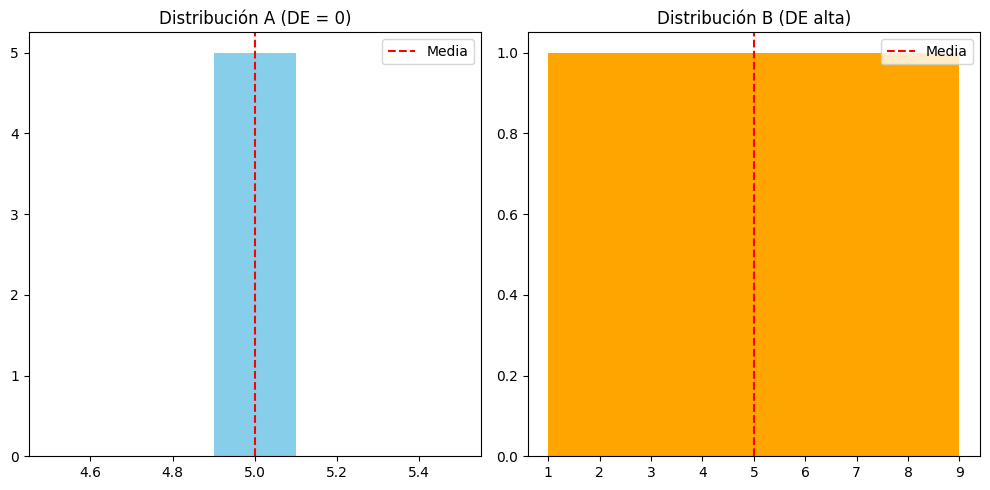

In [16]:

import matplotlib.pyplot as plt

a = [5, 5, 5, 5, 5]
b = [1, 3, 5, 7, 9]

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(a, bins=5, color='skyblue')
plt.title("Distribución A (DE = 0)")
plt.axvline(np.mean(a), color='red', linestyle='dashed', label='Media')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(b, bins=5, color='orange')
plt.title("Distribución B (DE alta)")
plt.axvline(np.mean(b), color='red', linestyle='dashed', label='Media')
plt.legend()

plt.tight_layout()
plt.show()